In [7]:
import sys
import warnings
sys.path.append("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
import os
os.chdir("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
warnings.filterwarnings('ignore')

In [11]:
import json 
import numpy as np
import matplotlib.pyplot as plt

f = open('optimal_n_full.json')
data = json.load(f)
 
same_means = []
different_means = []
n_values = [ i for i in range(10,101, 10)] + [ i for i in range(125,500, 25)]
for i in n_values:
    same, different = data[str(i)]
    same = np.array(same)
    different = np.array(different)
    same = same[~np.isnan(same)]
    different = different[~np.isnan(different)]
    same_means.append(np.mean(same)),
    different_means.append(np.mean(different))

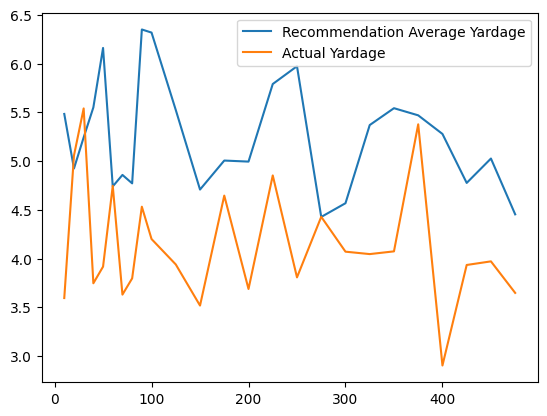

In [12]:
plt.plot(n_values, same_means, label="Recommendation Average Yardage")
plt.plot(n_values, different_means, label="Actual Yardage ")
plt.legend()

In [13]:
import json 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
f = open('optimal_n_full.json')
data = json.load(f)
 
same_means = []
same_skew = []
same_std = []
different_skew = []
different_means = []
different_std = []
n_values = [ i for i in range(10,101, 10)] + [ i for i in range(125,500, 25)]
for i in n_values:
    same, different = data[str(i)]
    same = np.array(same)
    different = np.array(different)
    same = same[~np.isnan(same)]
    different = different[~np.isnan(different)]
    same_means.append(np.mean(same))
    same_std.append(np.std(same))
    different_means.append(np.mean(different))
    different_std.append(np.std(different))
    same_skew.append(skew(same))
    different_skew.append(skew(different))

In [15]:
import scipy.stats as stats
significant_values = []
for i in range(len(n_values)):
    statistc , pvalue = stats.ttest_ind_from_stats(same_means[i], same_std[i] / n_values[i]**.5, n_values[i], different_means[i], different_std[i], n_values[i] / n_values[i]**.5)
    if pvalue <= .05:
        print(n_values[i])
        significant_values.append(n_values[i])



90
100
125
150
200
250
325
350
400
425
450
475


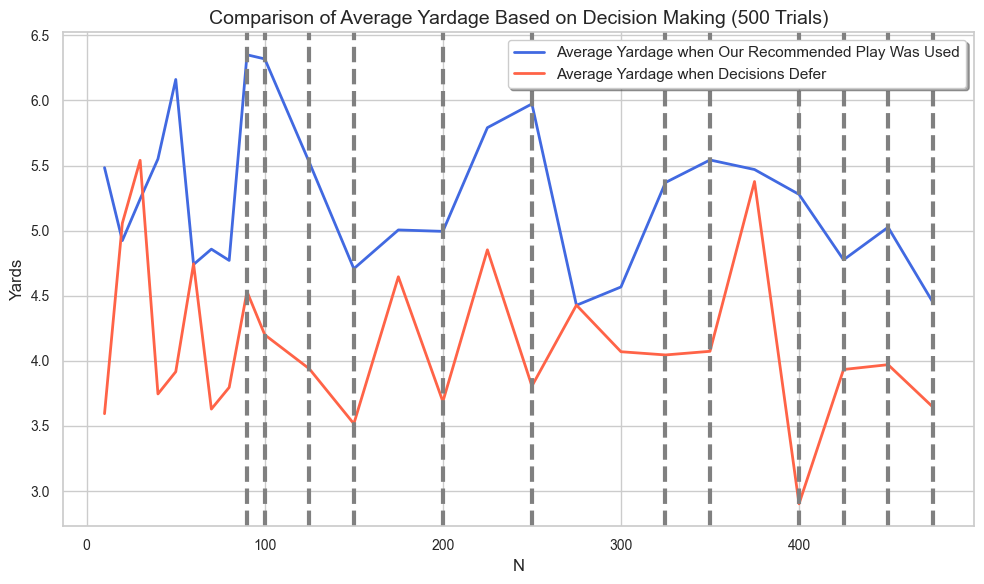

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))  
plt.plot(n_values, same_means, label="Average Yardage when Our Recommended Play Was Used", color='royalblue', linewidth=2)
plt.plot(n_values, different_means, label="Average Yardage when Decisions Defer", color='tomato', linewidth=2)

for value in significant_values:
    plt.axvline(value, color='grey', linestyle='--', linewidth=3)


plt.legend(loc="upper right", frameon=True, shadow=True)
plt.xlabel("N", fontsize=12)
plt.ylabel("Yards", fontsize=12)
plt.title("Comparison of Average Yardage Based on Decision Making (500 Trials)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()


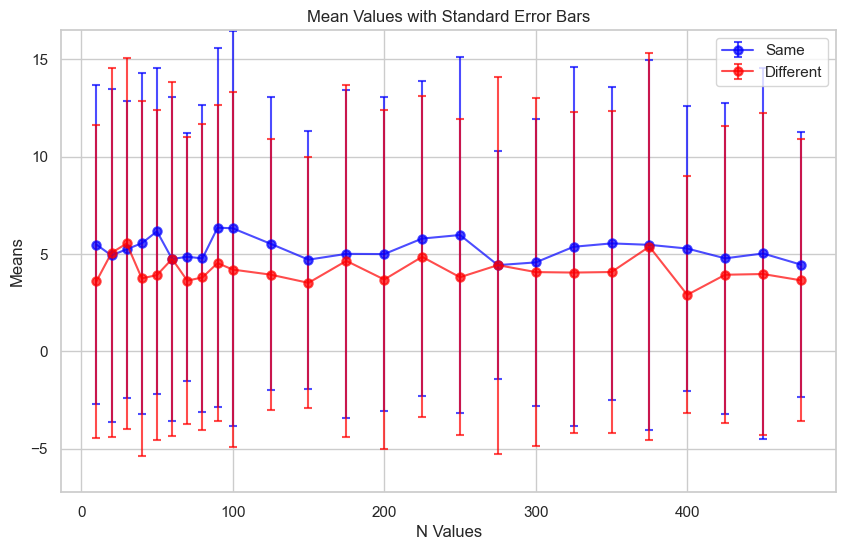

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
plt.errorbar(n_values, same_means, yerr=same_std, label='Same', fmt='-o', color='blue', capsize=3, elinewidth=1.5, markeredgewidth=1.5, alpha=0.7)
plt.errorbar(n_values, different_means, yerr=different_std, label='Different', fmt='-o', color='red', capsize=3, elinewidth=1.5, markeredgewidth=1.5, alpha=0.7)
plt.ylim([min(same_means + different_means) - max(same_std + different_std), max(same_means + different_means) + max(same_std + different_std)])


plt.title('Mean Values with Standard Error Bars')
plt.xlabel('N Values')
plt.ylabel('Means')
plt.legend()
plt.show()


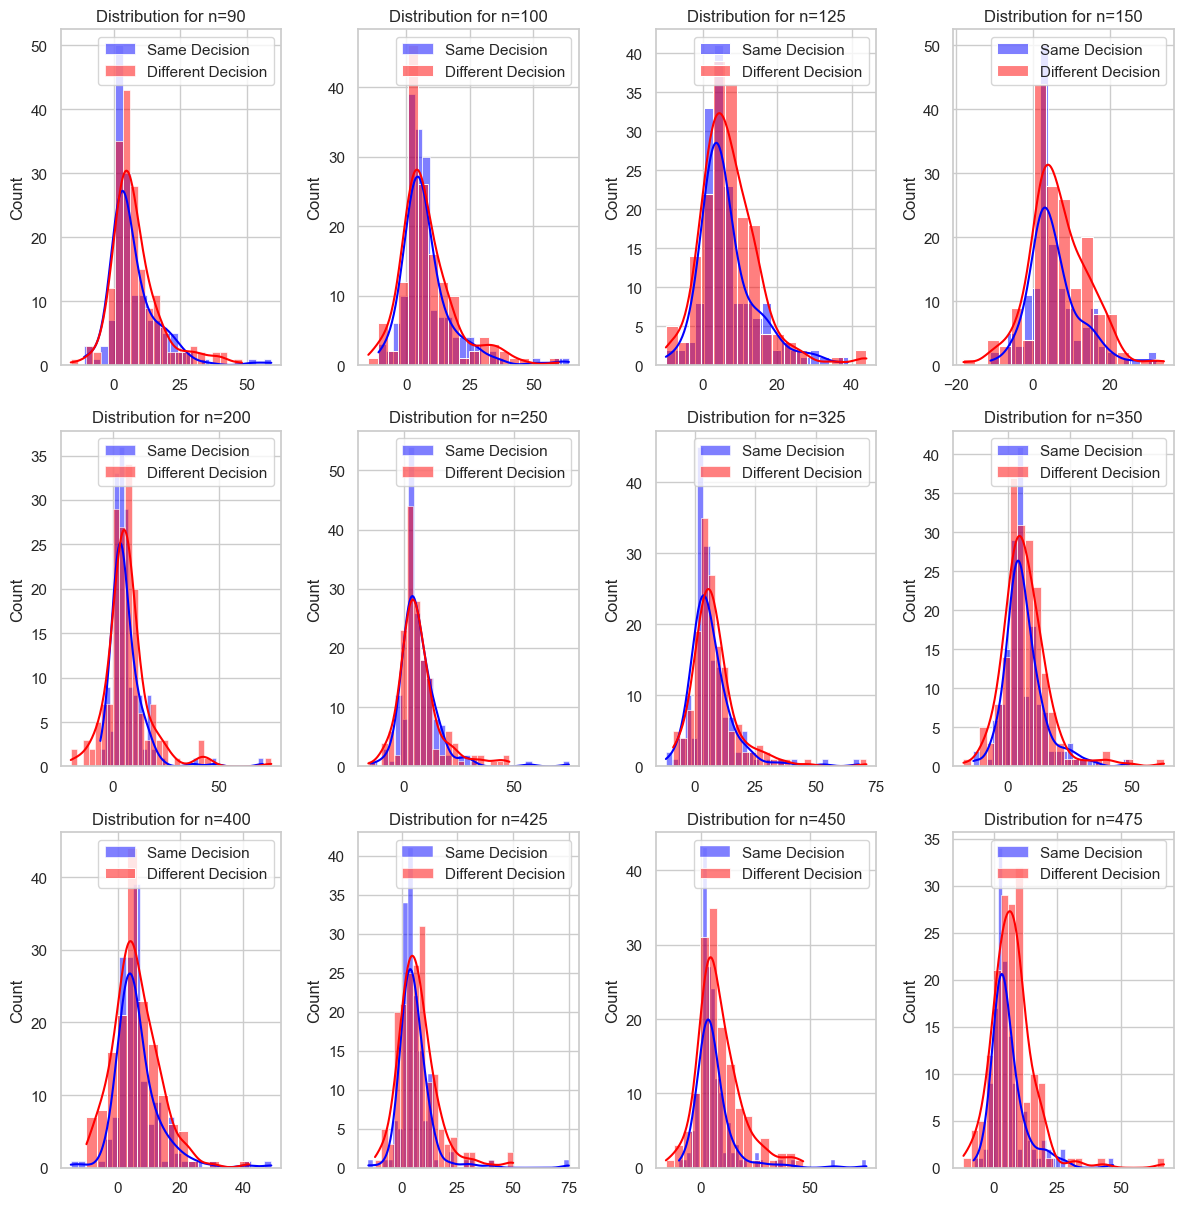

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_values = [i for i in range(10, 101, 10)] + [i for i in range(125, 500, 25)]


n_cols = 4
n_rows = len(n_values) // n_cols
if len(n_values) % n_cols != 0:
    n_rows += 1

plt.figure(figsize=(12, n_rows * 4))

for i, n in enumerate(significant_values, 1):
    same, different = data[str(n)]
    same = np.array(same)
    different = np.array(different)
    same = same[np.logical_and(~np.isnan(same), same != 0)]
    different = different[np.logical_and(~np.isnan(different), different != 0)]

    plt.subplot(n_rows, n_cols, i)
    sns.histplot(same, color="blue", label='Same Decision', kde=True)
    sns.histplot(different, color="red", label='Different Decision', kde=True)
    plt.title(f'Distribution for n={n}')
    plt.legend()

plt.tight_layout()
